In [1]:
import requests
import re
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv(r"C:\\Users\\amarn\\AMAR WEB SCRAPING PROJECT\\OYO_price_Analysis.csv")

In [3]:
df

Unnamed: 0                                        Hotel_Names  \
0             0                              SPOT ON Classic Lodge   
1             1                 Flagship Hotel Kanak International   
2             2         OYO Flagship 80983G RBS Square Langer Houz   
3             3        Collection O Hotel Rbs Kothapet-nagole Road   
4             4         OYO Flagship 80484G Hotel Srinivasa Grand    
..          ...                                                ...   
361         361  OYO Townhouse 810 Royal Palms Hotel - Daisy Co...   
362         362                Collection O Golden Tulipz Boutique   
363         363  OYO Hotel Ak Palace Near Chhatrapati Shivaji I...   
364         364  OYO Hotel Royal Grand Near Chhatrapati Shivaji...   
365         365             OYO Flagship Raj Hotel Near Juhu Beach   

                                               Address       City  Ratings  \
0                    Near Board Of Intermediate Office  Hyderabad      4.4   
1                          Near Nampally Train Station  Hyderabad      3.8   
2                                            Hyderabad  Hyderabad      3.9   
3                                            Hyderabad  Hyderabad      5.0   
4                                          Abids South  Hyderabad      3.4   
..                                                 ...        ...      ...   
361                                           Goregaon     Mumbai      3.6   
362                                         Kurla West     Mumbai      3.7   
363  On main street, Near Asalpha Metro Station, Sa...     Mumbai      3.1   
364          Near Sakinaka Metro Station, Andheri East     Mumbai      3.6   
365                                          Santacruz     Mumbai      3.1   

     Votes  Prices                                      Features  
0     1233   460.0              AC  Parking facility  Elevator    
1      135   576.0                 Elevator  Free Wifi  Geyser    
2       98   699.0             Free Wifi  Geyser  Power backup    
3        7   699.0                 Elevator  Free Wifi  Geyser    
4       32   649.0              Elevator  Geyser  Power backup    
..     ...     ...                                           ...  
361    494  3773.0   Parking facility  Free Wifi  Power backup    
362    683  3773.0          Reception  Free Wifi  Refrigerator    
363    254  3773.0                                    Free Wifi   
364    180  3773.0             Free Wifi  Geyser  CCTV cameras    
365    191  3773.0             Free Wifi  Geyser  Power backup    

[366 rows x 8 columns]

In [4]:
df.shape

(366, 8)

In [5]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [6]:
df

Hotel_Names  \
0                                SPOT ON Classic Lodge   
1                   Flagship Hotel Kanak International   
2           OYO Flagship 80983G RBS Square Langer Houz   
3          Collection O Hotel Rbs Kothapet-nagole Road   
4           OYO Flagship 80484G Hotel Srinivasa Grand    
..                                                 ...   
361  OYO Townhouse 810 Royal Palms Hotel - Daisy Co...   
362                Collection O Golden Tulipz Boutique   
363  OYO Hotel Ak Palace Near Chhatrapati Shivaji I...   
364  OYO Hotel Royal Grand Near Chhatrapati Shivaji...   
365             OYO Flagship Raj Hotel Near Juhu Beach   

                                               Address       City  Ratings  \
0                    Near Board Of Intermediate Office  Hyderabad      4.4   
1                          Near Nampally Train Station  Hyderabad      3.8   
2                                            Hyderabad  Hyderabad      3.9   
3                                            Hyderabad  Hyderabad      5.0   
4                                          Abids South  Hyderabad      3.4   
..                                                 ...        ...      ...   
361                                           Goregaon     Mumbai      3.6   
362                                         Kurla West     Mumbai      3.7   
363  On main street, Near Asalpha Metro Station, Sa...     Mumbai      3.1   
364          Near Sakinaka Metro Station, Andheri East     Mumbai      3.6   
365                                          Santacruz     Mumbai      3.1   

     Votes  Prices                                      Features  
0     1233   460.0              AC  Parking facility  Elevator    
1      135   576.0                 Elevator  Free Wifi  Geyser    
2       98   699.0             Free Wifi  Geyser  Power backup    
3        7   699.0                 Elevator  Free Wifi  Geyser    
4       32   649.0              Elevator  Geyser  Power backup    
..     ...     ...                                           ...  
361    494  3773.0   Parking facility  Free Wifi  Power backup    
362    683  3773.0          Reception  Free Wifi  Refrigerator    
363    254  3773.0                                    Free Wifi   
364    180  3773.0             Free Wifi  Geyser  CCTV cameras    
365    191  3773.0             Free Wifi  Geyser  Power backup    

[366 rows x 7 columns]

#### CREATE NEW COLUMNS:
#### BASED ON RATEING WE CREATE ONE MORE COLUMNS IS "REMARKS"

In [7]:
def rating(rating):
    if rating>=4.4:
        return 'Excellent'
    elif rating>=3.3 and rating<4.4:
        return 'Good'
    else:
        return 'Average'

In [8]:
df['Remark']=df['Ratings'].apply(rating)

In [9]:
df

Hotel_Names  \
0                                SPOT ON Classic Lodge   
1                   Flagship Hotel Kanak International   
2           OYO Flagship 80983G RBS Square Langer Houz   
3          Collection O Hotel Rbs Kothapet-nagole Road   
4           OYO Flagship 80484G Hotel Srinivasa Grand    
..                                                 ...   
361  OYO Townhouse 810 Royal Palms Hotel - Daisy Co...   
362                Collection O Golden Tulipz Boutique   
363  OYO Hotel Ak Palace Near Chhatrapati Shivaji I...   
364  OYO Hotel Royal Grand Near Chhatrapati Shivaji...   
365             OYO Flagship Raj Hotel Near Juhu Beach   

                                               Address       City  Ratings  \
0                    Near Board Of Intermediate Office  Hyderabad      4.4   
1                          Near Nampally Train Station  Hyderabad      3.8   
2                                            Hyderabad  Hyderabad      3.9   
3                                            Hyderabad  Hyderabad      5.0   
4                                          Abids South  Hyderabad      3.4   
..                                                 ...        ...      ...   
361                                           Goregaon     Mumbai      3.6   
362                                         Kurla West     Mumbai      3.7   
363  On main street, Near Asalpha Metro Station, Sa...     Mumbai      3.1   
364          Near Sakinaka Metro Station, Andheri East     Mumbai      3.6   
365                                          Santacruz     Mumbai      3.1   

     Votes  Prices                                      Features     Remark  
0     1233   460.0              AC  Parking facility  Elevator    Excellent  
1      135   576.0                 Elevator  Free Wifi  Geyser         Good  
2       98   699.0             Free Wifi  Geyser  Power backup         Good  
3        7   699.0                 Elevator  Free Wifi  Geyser    Excellent  
4       32   649.0              Elevator  Geyser  Power backup         Good  
..     ...     ...                                           ...        ...  
361    494  3773.0   Parking facility  Free Wifi  Power backup         Good  
362    683  3773.0          Reception  Free Wifi  Refrigerator         Good  
363    254  3773.0                                    Free Wifi     Average  
364    180  3773.0             Free Wifi  Geyser  CCTV cameras         Good  
365    191  3773.0             Free Wifi  Geyser  Power backup      Average  

[366 rows x 8 columns]

In [10]:
df.shape

(366, 8)

In [11]:
df.describe()

Ratings        Votes       Prices
count  366.000000   366.000000   366.000000
mean     3.787705   531.863388  1517.882514
std      0.616163   665.441337   698.763867
min      1.800000     0.000000   399.000000
25%      3.500000    62.000000  1055.500000
50%      3.800000   270.500000  1353.500000
75%      4.200000   764.500000  1868.500000
max      5.000000  3416.000000  3902.000000

In [12]:
df.columns

Index(['Hotel_Names', 'Address', 'City', 'Ratings', 'Votes', 'Prices',
       'Features', 'Remark'],
      dtype='object')

In [13]:
df

Hotel_Names  \
0                                SPOT ON Classic Lodge   
1                   Flagship Hotel Kanak International   
2           OYO Flagship 80983G RBS Square Langer Houz   
3          Collection O Hotel Rbs Kothapet-nagole Road   
4           OYO Flagship 80484G Hotel Srinivasa Grand    
..                                                 ...   
361  OYO Townhouse 810 Royal Palms Hotel - Daisy Co...   
362                Collection O Golden Tulipz Boutique   
363  OYO Hotel Ak Palace Near Chhatrapati Shivaji I...   
364  OYO Hotel Royal Grand Near Chhatrapati Shivaji...   
365             OYO Flagship Raj Hotel Near Juhu Beach   

                                               Address       City  Ratings  \
0                    Near Board Of Intermediate Office  Hyderabad      4.4   
1                          Near Nampally Train Station  Hyderabad      3.8   
2                                            Hyderabad  Hyderabad      3.9   
3                                            Hyderabad  Hyderabad      5.0   
4                                          Abids South  Hyderabad      3.4   
..                                                 ...        ...      ...   
361                                           Goregaon     Mumbai      3.6   
362                                         Kurla West     Mumbai      3.7   
363  On main street, Near Asalpha Metro Station, Sa...     Mumbai      3.1   
364          Near Sakinaka Metro Station, Andheri East     Mumbai      3.6   
365                                          Santacruz     Mumbai      3.1   

     Votes  Prices                                      Features     Remark  
0     1233   460.0              AC  Parking facility  Elevator    Excellent  
1      135   576.0                 Elevator  Free Wifi  Geyser         Good  
2       98   699.0             Free Wifi  Geyser  Power backup         Good  
3        7   699.0                 Elevator  Free Wifi  Geyser    Excellent  
4       32   649.0              Elevator  Geyser  Power backup         Good  
..     ...     ...                                           ...        ...  
361    494  3773.0   Parking facility  Free Wifi  Power backup         Good  
362    683  3773.0          Reception  Free Wifi  Refrigerator         Good  
363    254  3773.0                                    Free Wifi     Average  
364    180  3773.0             Free Wifi  Geyser  CCTV cameras         Good  
365    191  3773.0             Free Wifi  Geyser  Power backup      Average  

[366 rows x 8 columns]

## UNIVARIENT  ANALYSIS:
## NUMERICAL ANALYSIS:

## Hotels Rating which are more than 4.5

In [14]:
rat=df[df['Ratings']>4.5]
rat

Hotel_Names  \
3          Collection O Hotel Rbs Kothapet-nagole Road   
19           Collection O High Way Grand Luxury Rooms    
33       Super OYO Townhouse RCC Majestic 397 LB Nagar   
34   Super OYO Collection O 15141 Townvilla Guest H...   
35            Super OYO Capital O 11079 Hotel Prestige   
38   OYO Flagship Royal Stay Homes Near Asian Mall ...   
52   Super OYO Townhouse 164 ESI Hospital Near Hyde...   
64                   Super OYO Townhouse 1033 Ameerpet   
66                       Collection O 5072 Padmini Inn   
73                   Super OYO Townhouse 265 RCC Elite   
82   Super OYO Townhouse 359 Begumpet Near Hyderaba...   
84                 Super OYO Collection O RCC Pristine   
92                 Townhouse 1250 Rcc Premier Sr Nagar   
110                              SPOT ON Hotel Shreyas   
115                     Collection O G Silver Polonest   
121    SPOT ON Yatra Inn Near Lalbagh Botanical Garden   
128                            Townhouse 180 Jayanagar   
147      SPOT ON A Class Suites Near Hare Krishna Hill   
160                   OYO Flagship Hotel Grand Arabian   
162  Super OYO Collection O Compact Green View Near...   
163                      SPOT ON 36102 Akshara Regency   
165                          Collection O Fortune Park   
169  Super OYO Townhouse 273 Hosur Main Road Bomman...   
172  Super OYO Capital O High end Withinn Hotel Nea...   
177  Super OYO Townhouse 264 - Q Rooms BTM Layout N...   
178  Collection O Hotel 29 Church's Inn Near Cubbon...   
206                        Townhouse 610 Derawal Nagar   
234                            OYO Flagship Hotel Diva   
237                   OYO Flagship Decent Guest House    
244                       OYO Flagship The Knight Stay   
247                 OYO Flagship Hotel Luxury Paradise   
254                        OYO Flagship Hotel Deva Inn   
267                       OYO Flagship Hotel Black Inn   
273              OYO Flagship 811088 Hotel King Palace   
321                            OYO Mumbai Paying Guest   
322  Super OYO Hotel Divine Residency Near Phoenix ...   
349                 Townhouse 878 The Unicontinental 2   

                                               Address       City  Ratings  \
3                                            Hyderabad  Hyderabad      5.0   
19                                  Chandrapuri Colony  Hyderabad      5.0   
33                                           Champapet  Hyderabad      5.0   
34                                           Hyderabad  Hyderabad      4.8   
35                              Paradise ,Secunderabad  Hyderabad      4.6   
38                                   Attapur,Hyderabad  Hyderabad      4.8   
52                                        Sanath Nagar  Hyderabad      4.7   
64                                     Ameerpet Mandal  Hyderabad      4.6   
66                           Near S.D Road, Clocktower  Hyderabad      5.0   
73                               Opp To J S Babu Silks  Hyderabad      4.6   
82                             Vinn Hospital, Begumpet  Hyderabad      4.6   
84                                            Ameerpet  Hyderabad      4.6   
92                                            SR NAGAR  Hyderabad      4.9   
110                                         Prem Nagar  Bangalore      4.6   
115                                          Bengaluru  Bangalore      5.0   
121                                            Lalbagh  Bangalore      5.0   
128                   Near Sagar Hospital, Tilak Nagar  Bangalore      4.9   
147                                    Bangalore Urban  Bangalore      5.0   
160                                        Yeswanthpur  Bangalore      4.7   
162             Near Ejipura Bus stand, Ashwini Layout  Bangalore      4.9   
163                Near ADB Building, Gokula 1st Stage  Bangalore      5.0   
165                                   Gokula Extension  Bangalore      4.8   
169  Near krishna Theature Bommanahalli, Hos

## COUNT PLOT :

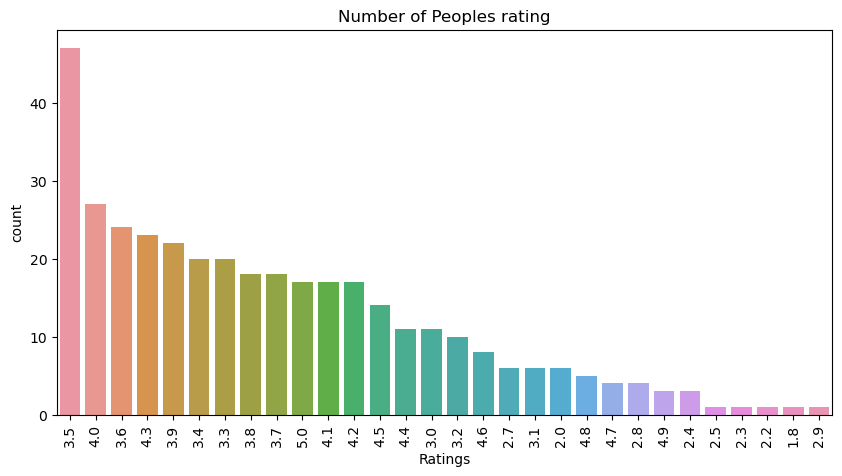

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Ratings"],order=df['Ratings'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Number of Peoples rating")
plt.show()

## HISTOGRAM :

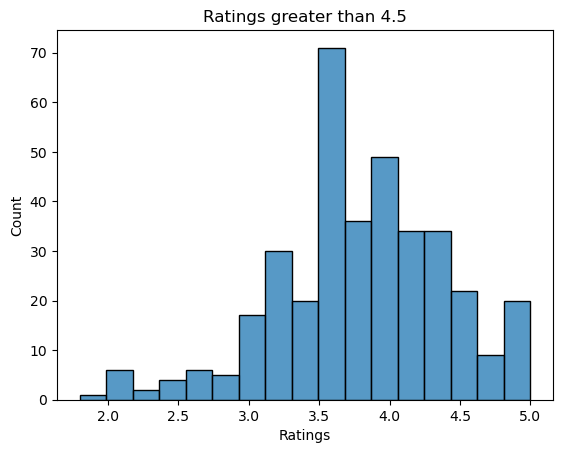

In [16]:
sns.histplot(data=df,x='Ratings')
plt.title('Ratings greater than 4.5')
plt.show()

 *  from the above plot we can see count of hotels where rating starts from 4.5 to 5.0

## Hotel votes which are greater than 2000:¶

In [17]:
vot=df[df['Votes']>2000]
vot

Hotel_Names  \
33       Super OYO Townhouse RCC Majestic 397 LB Nagar   
35            Super OYO Capital O 11079 Hotel Prestige   
39            Super OYO Capital O Alpine Glow Pinnacle   
46   Super OYO Collection O Hotel Lotus Grand Near ...   
52   Super OYO Townhouse 164 ESI Hospital Near Hyde...   
55                       OYO Townhouse 196 De Alphabet   
60                             Townhouse 862 Che Sigma   
64                   Super OYO Townhouse 1033 Ameerpet   
65                                 Flagship Malkajgiri   
73                   Super OYO Townhouse 265 RCC Elite   
74              OYO Athithi Inn Near Hyderabad Central   
82   Super OYO Townhouse 359 Begumpet Near Hyderaba...   
121    SPOT ON Yatra Inn Near Lalbagh Botanical Garden   
128                            Townhouse 180 Jayanagar   
161  Townhouse 385 Navya International Ramamurthy N...   
201          Townhouse 868 Dream Connect Near TDI Mall   
203  Super OYO Townhouse 381 Dilshad Garden Near Di...   
206                        Townhouse 610 Derawal Nagar   
211                     SPOT ON Hotel Silver Palace Dx   

                                      Address       City  Ratings  Votes  \
33                                  Champapet  Hyderabad      5.0   2902   
35                     Paradise ,Secunderabad  Hyderabad      4.6   3416   
39                Near Veg Market, Bowenpally  Hyderabad      4.5   2517   
46                               Secunderabad  Hyderabad      4.0   2684   
52                               Sanath Nagar  Hyderabad      4.7   3377   
55         Near Sai Baba Temple, Gudimalkapur  Hyderabad      4.3   2023   
60                                 Malkajgiri  Hyderabad      4.3   2161   
64                            Ameerpet Mandal  Hyderabad      4.6   2491   
65                                 Malkajgiri  Hyderabad      4.3   2269   
73                      Opp To J S Babu Silks  Hyderabad      4.6   2454   
74        Near Maithrivanam Complex, Ameerpet  Hyderabad      3.5   2116   
82                    Vinn Hospital, Begumpet  Hyderabad      4.6   2020   
121                                   Lalbagh  Bangalore      5.0   2672   
128          Near Sagar Hospital, Tilak Nagar  Bangalore      4.9   3273   
161      Near Rammamurthynagar Police Station  Bangalore      4.1   2480   
201   Wz-3 Opp Pillor No 322 Moti Nagar Delhi      Delhi      4.2   2828   
203                                  Pocket E      Delhi      4.3   2219   
206     Near Vinayak Hoptiat, Gujranwala Town      Delhi      5.0   2753   
211  Near RK ASHRAM METRO STATION, Pahar Ganj      Delhi      4.5   2445   

     Prices                                           Features     Remark  
33   2337.0                  Parking facility  Free Wifi  AC    Excellent  
35   1597.0            Parking facility  Elevator  Free Wifi    Excellent  
39   1262.0            Reception  Power backup  Refrigerator    Excellent  
46   1468.0        Parking facility  Free Wifi  Power backup         Good  
52   1881.0           Private entrance  Reception  Free Wifi    Excellent  
55   1631.0           Parking facility  Reception  Free Wifi         Good  
60   1984.0   Parking facility  Ticket tour assistance  Rec...       Good  
64   1924.0                Reception  Power backup  Security    Excellent  
65   1205.0           Parking facility  Reception  Free Wifi         Good  
73   2628.0               Reception  Caretaker  Power backup    Excellent  
74   1484.0        Parking facility  Free Wifi  Power backup         Good  
82   2505.0           Parking facility  Reception  Free Wifi    Excellent  
121  1044.0               Reception  Free Wifi  Power backup    Excellent  
128  1678.0                  Reception  Free Wifi  Caretaker    Excellent  
161  1588.0               Reception  Free Wifi  Power backup         Good  
201  1248.0           Parking facility  Reception  Free Wifi         Good  
203  1482.0                                            AC  TV        

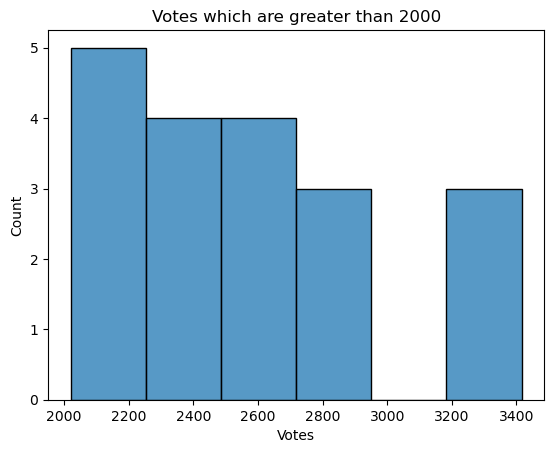

In [18]:
sns.histplot(data=vot,x='Votes')
plt.title("Votes which are greater than 2000")
plt.show()

 * from the above plot we are getting the count of hotels greater than 2000 votes

## price:

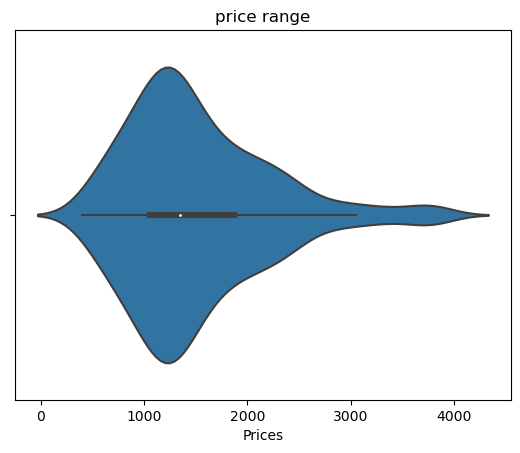

In [19]:
sns.violinplot(data=df,x='Prices')
plt.title("price range")
plt.show();

* from the above the middle dark line is called density it means the more prices are in that range an here most of hotel price are in the range of 500-1500

In [20]:
px.histogram(df['Prices'],x='Prices',title='Prices and its count')

* from above graph we will get exact number of hotels, and the price range,when we place cursor on that blue bar we will get variable,value,count

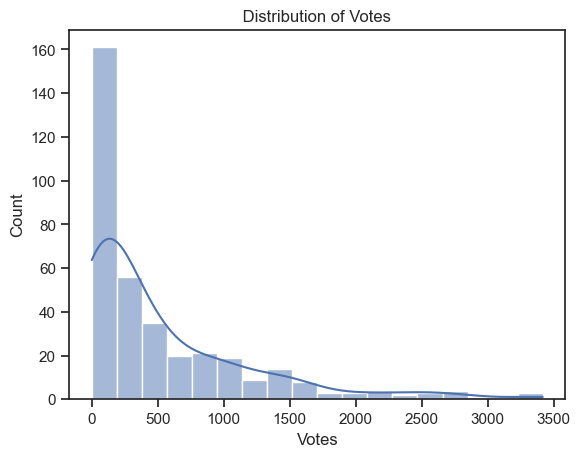

In [21]:
sns.set(style="ticks")
sns.histplot(data=df, x="Votes", kde=True)
plt.title(" Distribution of Votes ")
plt.show()

* from the above graph we can conclude the desnity is more in the range 0-1500 votes ,so most of the hotel votes are in that range

<Axes: xlabel='Ratings'>

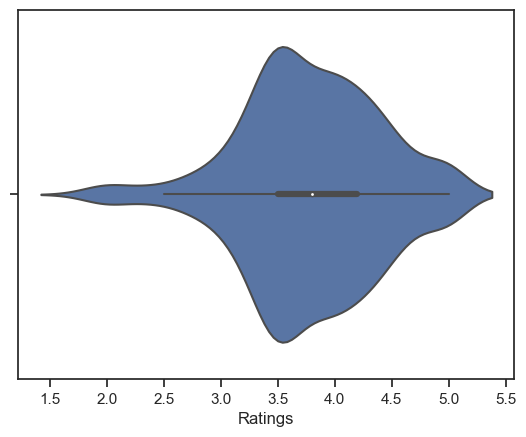

In [22]:
sns.violinplot(data=df,x='Ratings')

* from the above graph the middle line is called density it means the more ratings are in that range,so we can conclude that
  more hotel ratings are in that range

 ### Categorical columns Analysis:

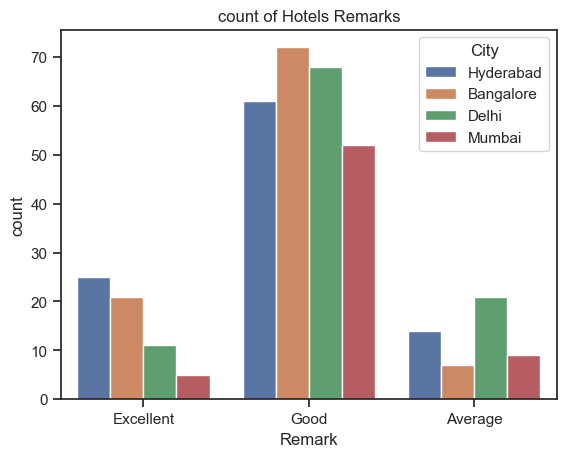

In [23]:
sns.countplot(data=df,x='Remark',hue="City")
plt.title("count of Hotels Remarks")
plt.show()

* from above graph we are getting count of total number of good,average and excellent  hotels in all cities 

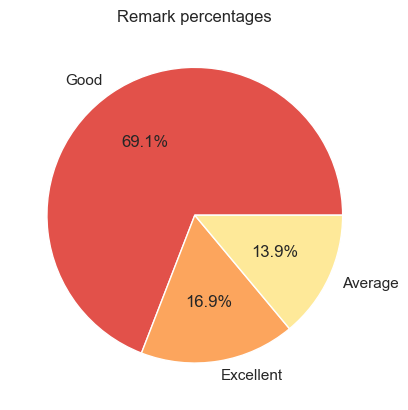

In [24]:
color_sns=sns.color_palette("Spectral")
plt.pie(df['Remark'].value_counts(),labels=df['Remark'].value_counts().index,autopct="%1.1f%%",colors=color_sns)
plt.title("Remark percentages")
plt.show()

* from the above grapgh here we are getting the percentage of Good,average and excellent hotels in each city

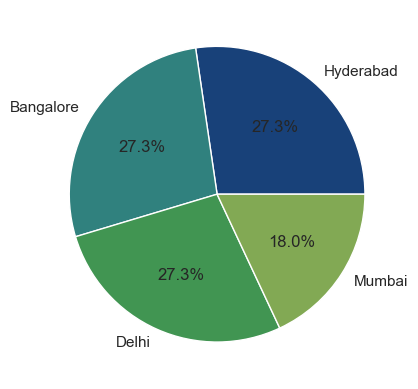

In [25]:
color_sns=sns.color_palette("gist_earth")
plt.pie(df['City'].value_counts(),labels=df['City'].value_counts().index,autopct="%1.1f%%",colors=color_sns)
plt.show()

* from above grapgh  we are getting the percentage of hotels in each city 

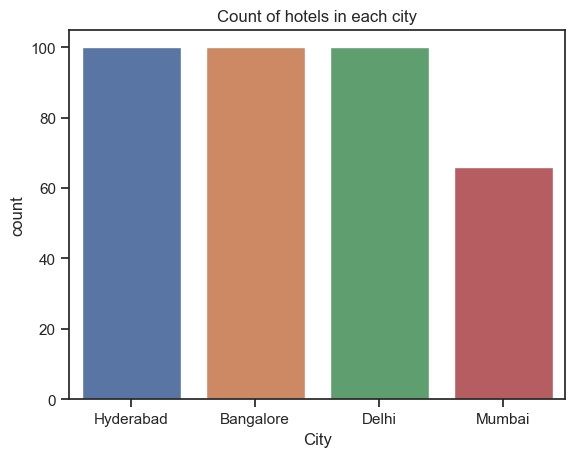

In [26]:
sns.countplot(data=df,x='City')
plt.title("Count of hotels in each city")
plt.show()

* from above graph we are getting count of total number of hotels in each city 

## CITY WISE REMARKS :

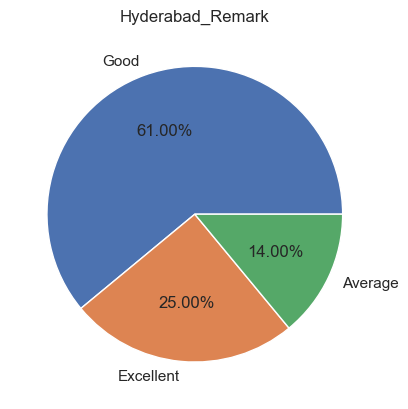

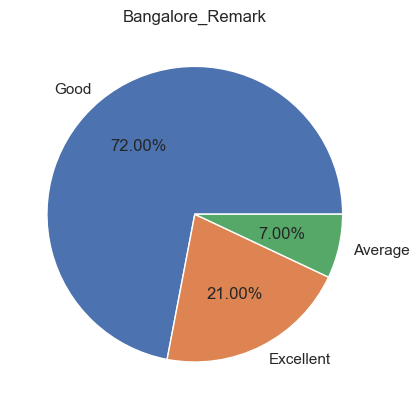

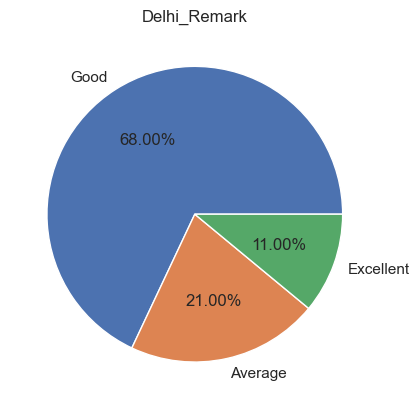

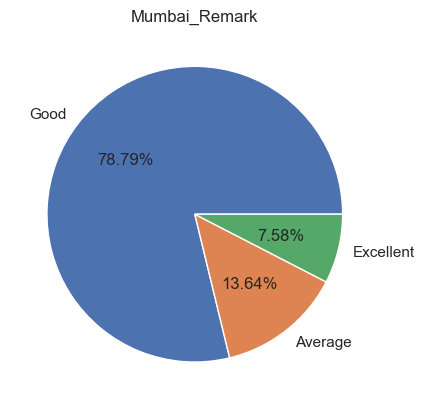

In [27]:
asd=df[df['City']=='Hyderabad']
a=asd['Remark'].value_counts()
plt.pie(a,labels=a.index,autopct='%1.2f%%')
plt.title('Hyderabad_Remark')
plt.show()
asd=df[df['City']=='Bangalore']
a=asd['Remark'].value_counts()
plt.pie(a,labels=a.index,autopct='%1.2f%%')
plt.title('Bangalore_Remark')
plt.show()
asd=df[df['City']=='Delhi']
a=asd['Remark'].value_counts()
plt.pie(a,labels=a.index,autopct='%1.2f%%')
plt.title('Delhi_Remark')
plt.show()
asd=df[df['City']=='Mumbai']
a=asd['Remark'].value_counts()
plt.pie(a,labels=a.index,autopct='%1.2f%%')
plt.title('Mumbai_Remark')
plt.show()

* from above graph we are getting the exact percentage hotes which belongs to the remark catagorie in Hyderabad,Banglore,Delhi and Mumbai .

In [28]:
city=input('enter the name of city :')
k=df[df['City']==city] 
a=max(k['Prices'])
print(a)



enter the name of city :Mumbai
3902.0


In [29]:
city=input('enter the name of city :')
k=df[df['City']==city] 
a=max(k['Features'])
print(a)


enter the name of city :Mumbai
 Reception  Ticket tour assistance  Caretaker  


* with the help of these code we can know the maximum  price and maximum Features  of the hotel  in any city

## Bivariant Analysis:

#### NUMERICAL VS NUMERICAL

In [30]:
px.scatter(x=df['Votes'],y=df['Ratings'])

* from above graph we can conclude if the votes are increasing then rating also will increase

### Categorical  vs numerical:

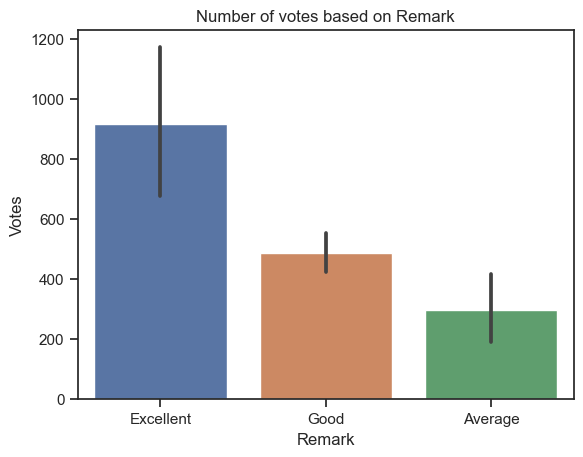

In [31]:
sns.barplot(x='Remark',y='Votes',data=df,orient='v')
plt.title("Number of votes based on Remark")
plt.show()

* from the above graph we can conclude that most of the hotels which are in excellent category have more votes

In [32]:
px.strip(x=df['City'],y=df['Prices'],title="Highest price hotels in four citys")

* from the above plot we can conclude that Mumbai has highest price hotels

In [33]:
fig = px.scatter(df, x="Remark", y="Prices", color='City',title="prices based on Remarks")
fig.show()

* from the above graph we can conclude that most of the hotels which are in Average category have more prices

### Categorical vs Categorical :

In [34]:
CON1=df[df['City']=='Bangalore']
CON2=CON1[CON1['Remark']=='Excellent']

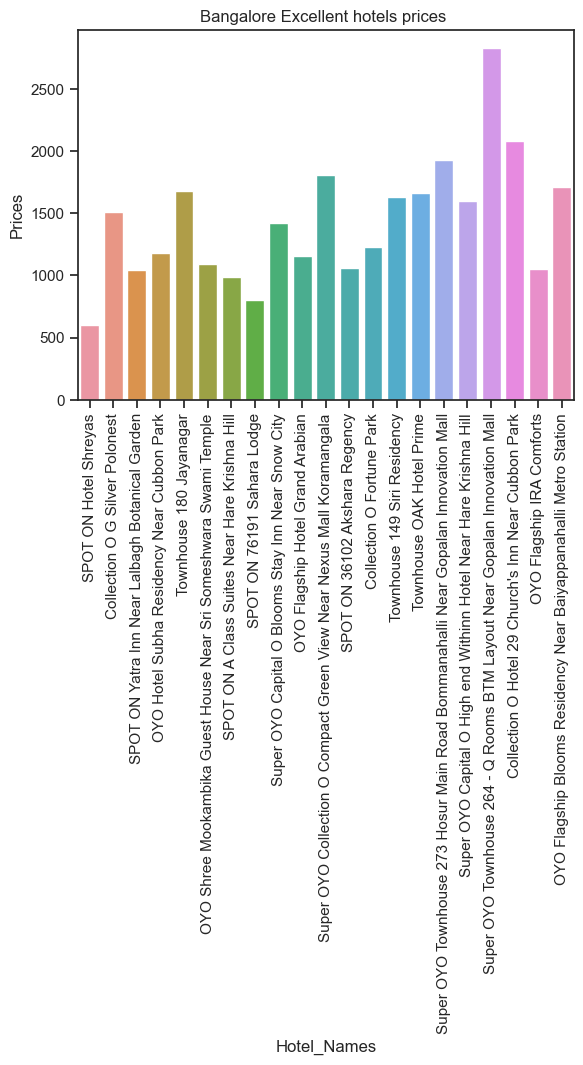

In [35]:
sns.barplot(data=CON2,x='Hotel_Names',y='Prices')
plt.title("Bangalore Excellent hotels prices ")
plt.xticks(rotation=90)
plt.show()

* from the above graph we can conclude these are the best hotels in Banglore city and from the above we observed that these particular `Super oyo Townhouse 264- Q rooms BTM Layout near gopalan innovation mall` hotel has max price

###  MULTI VARIENT ANALYSIS:

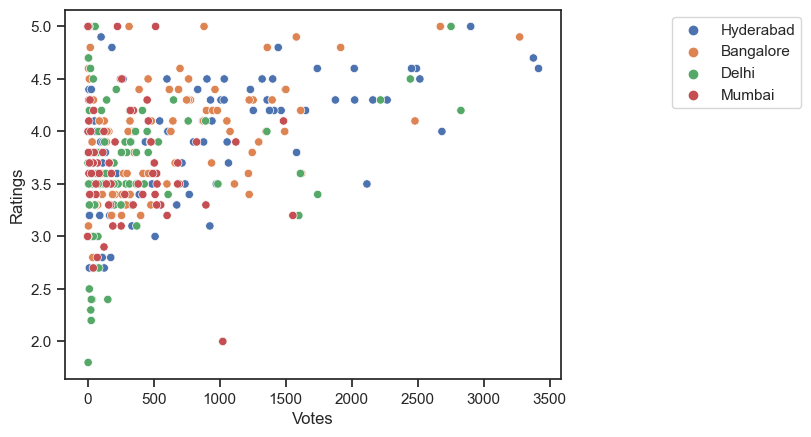

In [36]:
sns.scatterplot(y=df['Ratings'],x=df['Votes'],hue=df['City'])
plt.legend(bbox_to_anchor=(1.5,1))


* from the above graph we can conclude that most of the hotels lie with in the range of 0-3000 votes and Banglore has the max rating 

C:\Users\amarn\AppData\Local\Temp\ipykernel_23424\2271070662.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



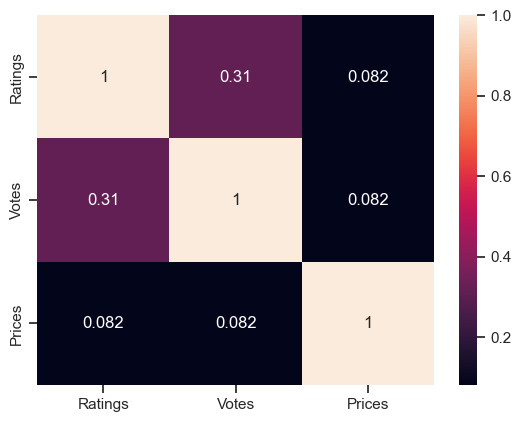

In [37]:
sns.heatmap(df.corr(),annot=True)
plt.show()

* from the above plot we can conclude that there are positive relations and negative relationship the positive relation and the positive relation depicts the relation between the two different columns where as negative relation doesnot effect any columns

In [41]:
Features=input("Enter the Features :")
city=input("Enter the city :")
price=float(input("Enter the price :"))
m=df[(df["Features"]==Features)&(df["City"]==City)&(df["Prices"]==Prices)]
m

Enter the Features :Free Wifi Geyser Power backup
Enter the city :Hyderabad
Enter the price :582.0


NameError: name 'Prices' is not defined

In [38]:
Hotel_Names=input('Enter the Hotel_Name: ')
City=input('Enter the City: ')
a=df[(df['Hotel_Names']==Hotel_Names)&(df['City']==City)]
a['Prices']

Enter the Hotel_Name: Capital O Hotel Pearl Near US Embassy
Enter the City: Mumbai


359    2896.0
Name: Prices, dtype: float64